# Quantile Regression: CQR, UQR, QTE & QTET

Prof. Daniel de Abreu Pereira Uhr


## Conteúdo

* Introdução
* Conceitos de Estatística Básica
* Regressão Quantílica
  * Conditional Quantile Regression (CQR)
  * Unconditional Quantile Regression (UQR)
  * Quantile Treatment Effects (QTEs)
  * Quantile Treatment Effects on the Treated (QTET)
* Aplicação em Python - pyqte


## Referências

* Cameron e Triverdi – Microeconometrics using stata. Capítulo 7 – Quantile Regression
* https://cran.r-project.org/web/packages/qte/vignettes/R-QTEs.html
* https://cran.r-project.org/web/packages/qte/qte.pdf
* Callaway, B. and Li, T. (2019), Quantile treatment effects in difference in differences models with panel data. Quantitative Economics, 10: 1579-1618. https://doi.org/10.3982/QE935
* Li, X.  Lin, L. (2024), Identification of quantile treatment effects in difference-in-differences settings with staggered adoption. Economics Letters, 241, 111792. https://doi.org/10.1016/j.econlet.2024.111792
* Koenker, R. 2005. Quantile Regression. New York: Cambridge University Press. 
* Koenker, R., and G. Bassett Jr. 1978. Regression quantiles. Econometrica 46: 33–50.
* Chernozhukov, V., and C. Hansen. 2005. An IV model of quantile treatment effects. Econometrica 73: 245–261.
* Firpo, S. 2007. Efficient semiparametric estimation of quantile treatment effects. Econometrica 75: 259–276.
* Frolich, M. 2007 Nonparametric IV estimation of local average treatment effects with covariates. Journal of Econometrics 139: 35–75.
* Frolich, M., and Melly, b. 2013. Unconditional Quantile Treatment Effects Under Endogeneity. Journal of Business & Economic Statistics, 31(3), 346-357.
* Firpo, S., and Pinto, C. (2016) Identification and Estimation of Distributional Impacts of Interventions Using Changes in Inequality Measures. J. Appl. Econ., 31: 457–486. doi: 10.1002/jae.2448.
* Firpo, S. 2009. Unconditional Quantile Regressions. Econometrica 77: 953–973. https://doi.org/10.3982/ECTA6822
* Abadie, A., J. Angrist, and G. Imbens. 2002. Instrumental variables estimates of the effect of subsidized training on the quantiles of trainee earnings. Econometrica 70: 91–117.
* Nicolai T Borgen, Andreas Haupt, Øyvind Nicolay Wiborg, Quantile regression estimands and models: revisiting the motherhood wage penalty debate, European Sociological Review, Volume 39, Issue 2, April 2023, Pages 317–331, https://doi.org/10.1093/esr/jcac052
* Athey, Susan and Guido Imbens. “Identification andInference in Nonlinear Difference-in-Differences Models.” Econometrica 74.2, pp. 431-497, 2006.
* Abadie, Alberto. 2005. “Semiparametric Difference-in-Differences Estimators.” The Review of Economic Studies 72 (1): 1–19.
* Callaway, Brantly and Tong Li. “Quantile Treatment Effects in Difference in Differences Models with Panel Data.” Quantitative Economics (https://doi.org/10.3982/QE935), 2019.
* Callaway, Brantly, Dong Li, and Tatsushi Oka. “Quantile Treatment Effects in Difference in Differences Models under Dependence Restrictions and with Only Two Time Periods.” Journal of Econometrics (https://doi.org/10.1016/j.jeconom.2018.06.008), pp. 395-413, 2018.


## Introdução

Ao identificar o efeito causal de uma intervenção, o pesquisador pode estar interessado em entender como o efeito da intervenção varia ao longo da distribuição da variável resposta. Para responder às perguntas relacionadas à heterogeneidade do efeito do tratamento, a regressão quantílica é uma ferramenta útil. A regressão quantílica é uma extensão da regressão linear que permite estimar os efeitos das covariáveis em diferentes quantis da distribuição da variável resposta. Isso permite que o pesquisador entenda como o efeito das covariáveis varia em diferentes partes da distribuição da variável resposta, fornecendo uma visão mais completa do impacto da intervenção.

Considere o seguinte contexto de políticas públicas: Se um programa de formação para o primeiro emprego tende a aumentar os salários no topo da distribuição salarial, é provável que seja rejeitado pelos decisores políticos. Por outro lado, se o programa tende a aumentar os salários na base da distribuição salarial, poderá ser aprovado. A ideia de que a participação em um programa pode ter um efeito diferente, mesmo em indivíduos observacionalmente idênticos, tem uma longa história na literatura econométrica (Heckman e Robb, 1985). Tem havido muito interesse recente em estudar a heterogeneidade do efeito do tratamento (Heckman, Smith e Clements, 1997; Abbring e Heckman, 2007). 

Para entender como identificar o efeito heterogêneo do tratamento nos diferentes pontos da distribuição de uma variável de resposta, precisamos entender o conceito de Regressão Quantílica (Quantile Regression). Assim, vamos entender o que é regressão quantiílica, como ela se desenvolveu e como ela pode ser usada para identificar o efeito heterogêneo do tratamento.

## Conceitos de Estatística Básica

**Distribuição dos dados**

1. Normal (Gaussiana; “tipo sino”)
2. Assimétrica à direita (Right skewed ou Positive Skew; cauda direita maior)
3. Assimétrica à esquerda (Left skewed ou Negative Skew; cauda esquerda maior)
4. Uniforme

**Medidas de tendência central**

1. Média
2. Mediana
3. Moda

Vejamos graficamente, suponha que estamos estudando a distribuição de uma variável de resultado qualquer (Y).

<div style="text-align:center;">
    <img src="images/distr_01.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


Nossa preocupação estava centrada na escolha de um grupo de controle que melhor representasse o contrafactual para o grupo tratado, para que eliminássemos as fontes de viés de variável omitida/viés de seleção amostral. Ou seja, queríamos identificar o efeito causal do tratamento sobre a variável de resultado controlando todas as outras fontes de variação.

Nesse primeiro momento, nosso interesse mudou, e queremos verificar se o efeito do tratamento é homogêneo ao longo da distribuição da variável de resultado. Ou seja, queremos verificar se o efeito do tratamento é o mesmo para todos os indivíduos, independentemente de sua posição na distribuição da variável de resultado.

Vejamos a distribuição dos dados ao longo de uma variável de tratamento contínua.

Vamos analisar graficamente três casos:

1. Distribuição normal e homocedástica
2. Distribuição normal e heterocedástica
3. Distribuição assimétrica

<div style="text-align:center;">
    <img src="images/distr_02.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


A regressão linear é útil para resumir o relacionamento entre a variável de resultado e o conjunto de regressores, baseado na média condicional: 

$$E(y|x)$$


Nesse primeiro caso, nos três pontos analisados da distribuição a inclinação da reta de regressão é a mesma, ou seja, o efeito seria o mesmo para todos os indivíduos, independentemente de sua posição na distribuição da variável de resultado.

Mas esse tipo de análise pode prover uma visão parcial do relacionamento. Vejamos o que acontece em outra situação.

<div style="text-align:center;">
    <img src="images/distr_03.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Repare que agora a inclinação da reta de regressão é diferente para cada ponto da distribuição. Isso significa que o efeito seria diferente para cada ponto da distribuição da variável de resultado.

Por fim, vejamos o que acontece em uma distribuição assimétrica.

<div style="text-align:center;">
    <img src="images/distr_04.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Novamente, fica mais claro que o efeito seria diferente para cada ponto da distribuição da variável de resultado.

Então, a regressão linear não é suficiente para capturar a heterogeneidade do efeito do tratamento ao longo da distribuição da variável de resultado. A regressão quantílica (Quantile Regression - QR) é uma ferramenta estatística que nos proporciona essa nova perspectiva.

## Regressão Quantílica (QR - Quantile Regression)

Os estimadores de regressão quantílica (Quantile Regression - QR) apresentam uma vasta literatura teórica e empírica, tanto na literatura econômica quanto estatística. Minha ideia aqui é realizar uma introdução ao tema, apresentando os principais conceitos, estimadores e aplicações.

Logo, para entendermos o desenvolvimento dos estimadores, as principais dificuldades com a busca pelo efeito quantílico, e a modelagem para identificação causal, eu separei essa apresentação nos seguintes tópicos:

- **Conditional Quantile Regression (CQR)**
- **Unconditional Quantile Regression (UQR)**
- **Quantile Treatment Effects (QTE)**
- **Quantile Treatment Effects on the Treated (QTET)**

### Conditional Quantile Regression (CQR)

Podemos dizer que a busca pela identificação do efeito de uma variável "X" sobre diferentes quantís de uma variável de resposta "Y" iniciou com o método de Regressão Quantílica Condicional (Conditional Quantile Regression - CQR) de Koenker e Bassett (1978). Os autores propuseram um estimador de mínimos quadrados para a mediana condicional. A ideia era minimizar a soma dos resíduos absolutos, ao invés dos quadrados dos resíduos, como na regressão linear. 

**Vantagens da Regressão Quantílica:**

- **Robustez a Outliers**: A regressão quantílica na mediana, conhecida como regressão de mínimos desvios absolutos, é mais robusta a outliers do que a regressão na média, pois minimiza o impacto de valores extremos.
- **Flexibilidade**: A QR permite estudar o impacto dos regressores em diferentes pontos da distribuição, como localização (mediana) e escala (dispersão), oferecendo uma visão mais completa das relações entre variáveis.
- **Semiparamétrica**: A QR é considerada uma técnica semiparamétrica, pois faz menos suposições sobre a distribuição dos erros, sendo adequada para dados heterocedásticos, onde a variância dos erros não é constante.

**Definições Importantes:**

- A **função de densidade acumulada (CDF)** é definida como $F(y) = Pr(Y \geq y)$, onde $F(y_{\text{mediana}}) = 1/2$ é a equação cuja solução define a mediana $y_{\text{mediana}} = F^{-1}(1/2)$.
- Um **quantil $q$** é o valor de $y$ que divide os dados em proporções "q abaixo" e "(1-q) acima", ou seja, $F(y_q) = q$ e $y_q = F^{-1}(q)$. Por exemplo, se $y_{0.99} = 200$, então $Pr(Y \leq 200) = 0,99$.
- Estes conceitos se estendem para a **regressão quantílica condicional** $Q_q(y|x)$, onde o quantil condicional é tomado como linear em $x$.

Na regressão quantílica, os resíduos $e_i$ do modelo são minimizados de maneira diferente da OLS. O OLS minimiza $\sum_i e_i^2$, enquanto a regressão na mediana minimiza $\sum_i |e_i|$. O estimador quantílico $\hat{\beta}_q$ é então encontrado minimizando a seguinte função objetivo:

$$ 
Q(e_i) = \sum_{i: y_i \geq x_i'\beta_q}^N q |y_i - x_i'\beta_q| + \sum_{i: y_i < x_i'\beta_q}^N (1-q) |y_i - x_i'\beta_q| 
$$

Aqui, $q$ representa o quantil de interesse. Por exemplo, se $q = 0,90$, mais peso é dado às observações com valores de $y$ maiores, resultando em uma estimativa que enfatiza as observações no topo da distribuição.

Esse problema é resolvido por meio de técnicas de **programação linear** (PL), como o método simplex, que encontra a solução para o $\beta_q$ associado a cada quantil.

**Exemplo Gráfico:**

Considere que queremos estudar o quantil 90 ($q_{90}$) da renda de uma população, condicionado aos anos de estudo. O objetivo do pesquisador é entender como os anos de estudo (X) afetam a posição de um indivíduo no $q_{90}$ da distribuição de renda.

<div style="text-align:center;">
    <img src="images/distr_05.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Na figura acima, tanto o indivíduo A quanto o indivíduo B encontram-se no quantil 90 condicionado no seu nível de educação ($X =$ nível de educação). Além disso, repare que o efeito da educação para os indivíduos no quantil 90 é maior do que o efeito estimado na média pela OLS.

Este exemplo demonstra como a CQR nos permite analisar o efeito da educação em diferentes pontos da distribuição condicional da renda, algo que a regressão linear simples não pode capturar.

**Limitações e críticas:**

É importante notar que as conclusões da Regressão Quantílica Condicional não se aplicam à distribuição da população. 

Logo, se o objetivo é examinar o impacto de uma variável sobre a distribuição incondicional dos salários, deve-se utilizar a **Regressão Quantílica Incondicional (UQR)**. A figura a seguir ilustra essa distinção:

<div style="text-align:center;">
    <img src="images/distr_06.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Observe que o indivíduo A está em uma posição inferior quando não está condicionado ao nível de educação dos outros indivíduos. Isso ilustra que, embora a CQR possa ser poderosa para entender efeitos dentro de subgrupos específicos (análise condicionada), seus resultados podem não ser generalizáveis ou interpretáveis no contexto populacional mais amplo.

Então, em contraste, a Regressão Quantílica Incondicional (UQR) oferece uma visão mais abrangente e interpretável, pois considera a distribuição marginal dos dados e os efeitos sobre toda a população.

**Práticas de Pesquisa:**

Do ponto de vista de aplicação empírica, se estivermos interessados ​​em uma análise condicional e assumirmos que o tratamento é exógeno (condicional em X), podemos usar os estimadores de regressão quantílica propostos por Koenker e Bassett (1978). Agora, se estivermos interessados ​​em efeito do tratamento condicional, mas se o tratamento for endógeno, o estimador de variável instrumental (IV) de Abadie, Angrist e Imbens (2002) pode ser aplicado.

### Unconditional Quantile Regression (UQR)

A Regressão Quantílica Incondicional (UQR) foi formalizada por Firpo, Fortin e Lemieux em seu artigo de 2009, *Unconditional Quantile Regressions*, Econometrica. E ajudou a avançar a literatura sobre a análise de efeitos heterogêneos do tratamento, principalmente, relacionando as variáveis explicativas com os quantis da distribuição incondicional da variável de resultado. Este método representa uma extensão significativa das técnicas tradicionais de regressão quantílica, permitindo a análise dos efeitos dos regressores em diferentes quantis da distribuição incondicional de uma variável dependente. A UQR é um caso especial da Regressão baseada em Funções de Influência Recentradas (RIF - Recentered Influence Functions).

### Definições Importantes para a Formalização do UQR

Para entender a UQR, é essencial primeiro familiarizar-se com alguns conceitos fundamentais:

1. **Coleção de Dados**: 
   - $Y = \{y_1, y_2, y_3, \dots, y_N\}$ é a coleção de dados observados.

2. **Função de Distribuição Cumulativa (CDF)**:
   - Representada como $F(Y)$ ou $F_Y$, descreve a probabilidade de uma variável aleatória $Y$ ser menor ou igual a um determinado valor.

3. **Função de Densidade de Probabilidade (PDF)**:
   - Representada como $f(Y)$ ou $f_Y$, descreve a probabilidade de $Y$ assumir um valor específico.

Esses conceitos permitem que qualquer estatística distribucional $v(Y)$ possa ser estimada para diferentes pontos da distribuição de $Y$.

### Função de Influência Recentrada (RIF)

Uma Função de Influência (Influence Function, IF) mede o efeito infinitesimal de uma observação sobre uma estatística de interesse $v(F(Y))$. Quando recentramos essa função, obtemos a **Função de Influência Recentrada (RIF)**, que representa o efeito de re-escala provocado por uma mudança na distribuição de $Y$.

A Função de Influência é definida como:

$$
\Delta v = v(G(Y)) - v(F(Y))
$$

Onde $\Delta v$ é a mudança na estatística $v$ quando $F_Y \rightarrow G_Y$, ou seja, quando a distribuição de $Y$ muda de $F_Y$ para $G_Y$.

Conforme Firpo, Fortin e Lemieux (2009), a RIF é dada por:

$$
RIF(y_i, v(F(Y))) = v(F(Y)) + IF(y_i, v(F(Y)))
$$

Aqui, $RIF(y_i, v(F(Y)))$ representa a contribuição da observação $y_i$ para a estatística $v(F(Y))$. As estimativas da regressão baseada em RIF dependem da estatística específica que estamos interessados em estudar:

- **Para a média**: $RIF(y_i, \mu_Y) = y_i$
- **Para a variância**: $RIF(y_i, \sigma_Y^2) = (y_i - \mu_Y)^2$
- **Para o quantil $p$**: $RIF(y_i, q_Y(p)) = q_Y(p) + \frac{p - 1(y \leq q_Y(p))}{f_Y(q_Y(p))}$

A UQR, então, é um caso especial da regressão RIF. A ideia central é modelar a relação entre as variáveis explicativas e a estatística de interesse (como o quantil) ao longo da distribuição incondicional de $Y$.

Para entender melhor, considere uma regressão linear simples:

$$
y = b_0 + b_1 x_1 + b_2 x_2 + e
$$

Neste modelo, estamos interessados em como mudanças nas variáveis $x_1$ e $x_2$ afetam o valor esperado de $y$. Na UQR, estamos essencialmente fazendo o mesmo, mas em vez de olhar para a média condicional de $y$, estamos olhando para como essas variáveis afetam os quantis de $y$ ao longo da distribuição incondicional.

$$
RIF(y_i, v(F(Y))) = \alpha_0 + \alpha_1 x_1 + \alpha_2 x_2 + \epsilon
$$

Essa equação modela como mudanças em $x_1$ e $x_2$ estão relacionadas às contribuições das observações $y_i$ para a estatística de interesse $v(F(Y))$, que, no caso da UQR, pode ser um quantil específico.

**Considerações:**

Na UQR, estamos interessados em como as variáveis explicativas afetam os quantis incondicionais da distribuição de $Y$. Quando utilizamos a RIF, estamos modelando o impacto de todas as observações na distribuição de $Y$, mas sumarizando esses efeitos em uma estatística específica. É crucial entender que, na UQR, não estamos medindo associações causais diretas em mudanças individuais das covariáveis, mas sim mudanças na distribuição dessas covariáveis e como isso afeta a distribuição do resultado (nível populacional).  Portanto, a UQR mede a probabilidade reescalada de um indivíduo ter um resultado abaixo de um dado quantil, mas não a probabilidade de pertencer diretamente àquele quantil.




### Quantile Treatment Effects (QTE)

Em paralelo ao desenvolvimento da UQR, a literatura seguiu em busca da análise do efeito causal de uma intervenção ou tratamento sobre os diferentes quantís da variável de resultado. Assim, o conceito de Quantile Treatment Effect (QTE) foi desenvolvido para analisar como o efeito de um tratamento varia ao longo da distribuição da variável resposta. A literatura é ampla, vejamos alguns autores e suas contribuições:

* Frolich, M., and Melly, b. 2013. Unconditional Quantile Treatment Effects Under Endogeneity. Journal of Business & Economic Statistics, 31(3), 346-357.
* Chernozhukov, V., and C. Hansen. 2005. An IV model of quantile treatment effects. Econometrica 73: 245–261.
* Frolich, M. 2007 Nonparametric IV estimation of local average treatment effects with covariates. Journal of Econometrics 139: 35–75.
* Firpo, S. 2007. Efficient semiparametric estimation of quantile treatment effects. Econometrica 75: 259–276.

O **Quantile Treatment Effect (QTE)** é uma extensão do conceito de Efeito Médio de Tratamento (ATE) aplicado aos quantis da distribuição da variável de resultado. O QTE permite analisar como o efeito de um tratamento varia ao longo da distribuição da variável resposta, proporcionando uma compreensão mais detalhada das heterogeneidades no efeito do tratamento.

#### Definição Formal

Dado um conjunto de resultados potenciais, $ Y_1 $ e $ Y_0 $, que representam os resultados sob tratamento e sem tratamento, respectivamente, o QTE para um quantil específico $ \tau $ é definido como:

$$
QTE_\tau = Q_{Y_1}(\tau) - Q_{Y_0}(\tau)
$$

onde $ Q_{Y_1}(\tau) $ e $ Q_{Y_0}(\tau) $ representam os quantis $ \tau $ das distribuições dos resultados potenciais para os grupos tratados e não tratados, respectivamente.

O QTE é particularmente relevante em situações onde os formuladores de políticas precisam entender não apenas o efeito médio de um tratamento, mas também como esse efeito é distribuído ao longo da população. Por exemplo, em um estudo sobre o impacto de um programa de treinamento na renda, o QTE pode revelar se o programa beneficia de maneira mais significativa aqueles no topo ou na base da distribuição salarial. Esse tipo de análise é crucial para decisões políticas mais informadas e justas.

Para estimar o QTE, é comum utilizar métodos como: **Reweighting via Propensity Scores**: Um método comum de estimar o QTE é através da reponderação das observações usando escores de propensão. A ideia é construir pesos para que, dentro de cada estrato de covariáveis, a distribuição do tratamento seja como se fosse aleatória.

#### Exemplo Gráfico

Vejamos duas formas de ilustrar o QTE:
* Na primeira supomos um efeito uniforme no grupo dos tratados (Senário 1).
* Na segunda supomos um efeito crescente no grupo dos tratados (Senário 2).

Abaixo o primeiro senário:

<div style="text-align:center;">
    <img src="images/distr_07.PNG"  alt="Imagem" style="width: 1200px;"/>
</div>

Agora veja o segundo senário:

<div style="text-align:center;">
    <img src="images/distr_08.PNG"  alt="Imagem" style="width: 1200px;"/>
</div>


Repare que estamos sempre verificando o efeito do tratamento em diferentes pontos da distribuição da variável de resultado. Isso é o que o QTE nos proporciona. Entretanto, a análise pode ser mais aprofundada, vejamos o QTET.

### Quantile Treatment Effect on the Treated (QTET)

O *Quantile Treatment Effect on the Treated* (QTET) é uma extensão do conceito de Quantile Treatment Effect (QTE) que se concentra em avaliar o efeito do tratamento sobre os indivíduos que efetivamente receberam o tratamento. O QTET é particularmente útil para entender como o tratamento afeta a distribuição dos resultados entre os indivíduos tratados, permitindo uma análise mais detalhada da heterogeneidade do efeito do tratamento. Para estimar o QTET, é necessário considerar a distribuição dos resultados potenciais não tratados para os indivíduos tratados. A identificação é baseada no estimador de diferença em diferenças quantílicas (QDiD), que compara os quantis condicionais dos resultados tratados e não tratados.

O estimador QDiD é uma extensão do método tradicional de Diferença em Diferenças (DiD). Enquanto o DiD convencional estima o impacto médio de um tratamento sobre os tratados, o QDiD visa capturar como esse impacto varia ao longo da distribuição da variável dependente entre os indivíduos tratados.


**Hipóteses de identificação:**
* Tendências Paralelas
* Independência Distribucional
* Estabilidade da Cópula

A suposição central do DiD tradicional é a de **tendências paralelas**, formalmente expressa como:

$$
E[\Delta Y_0^t | D = 1] = E[\Delta Y_0^t | D = 0]
$$

Onde $ \Delta Y_0^t = Y_0^t - Y_0^{t-1} $ é a variação nas variáveis de resultado não tratadas ao longo do tempo. A igualdade mostra que o contrafactual segue a tendência temporal do grupo não tratado.

Para identificar o QTET, é necessário fortalecer a suposição de **Independência Distribucional**:

$$
\Delta Y_0^t \perp D
$$

Essa suposição implica que a distribuição da mudança das variáveis de resultados potenciais não tratados é independente de ser parte do grupo tratado ou não tratado. Essa generalização é necessária para capturar não apenas o efeito médio, mas também a distribuição completa dos resultados.

Uma das principais dificuldades na identificação do QTET é que ela depende de uma dependência desconhecida (cópula) entre a mudança nas variáveis de resultado potenciais não tratadas e o nível inicial dessas variáveis de resultado no grupo tratado. Para superar isso, o artigo introduz a **hipótese de Estabilidade da Cópula**, que assume que essa dependência é constante ao longo do tempo:

$$
C_{\Delta Y_0^t, Y_0^{t-1}|D=1}(\cdot, \cdot) = C_{\Delta Y_0^{t-1}, Y_0^{t-2}|D=1}(\cdot, \cdot)
$$

Com essa suposição, e assumindo que há acesso a dados em painel, o QTET pode ser identificado.


**Identificação**

O QTET é definido como:

$$
QTET(\tau) = F^{-1}_{Y_1^t|D=1}(\tau) - F^{-1}_{Y_0^t|D=1}(\tau)
$$

Onde $ F^{-1}_{Y_1^t|D=1}(\tau) $ e $ F^{-1}_{Y_0^t|D=1}(\tau) $ representam, respectivamente, os quantis da distribuição das variáveis de resultado tratados observados e dos resultados potenciais não tratados contrafactuais para o grupo tratado.


**Considerações**

O QDiD, ao permitir a análise dos efeitos do tratamento ao longo de toda a distribuição de resultados, oferece uma ferramenta para entender a heterogeneidade do impacto de eventos econômicos, sendo uma extensão natural e robusta do modelo DiD tradicional para o contexto quantílico.


## Aplicação em Python - pyqte






Eu criei esse estimador "pyqte" que é uma extensão do pacote "qte" do R. O objetivo é facilitar a aplicação dos métodos de QTE e QTET em Python. O pacote "pyqte" é uma ferramenta para estimar os efeitos do tratamento em diferentes quantis da distribuição da variável de resultado. O pacote é baseado em métodos de reponderação e diferença em diferenças quantílicas, permitindo a análise da heterogeneidade do efeito do tratamento ao longo da distribuição da variável de resultado.

Para os exemplos eu utilizo as mesmas bases de dados utilizadas pelo estimador original do R "qte":

**Bases de dados:**
* *lalonde_exp* - Lalonde’s Experimental Dataset
  * The cross sectional verion of the experimental part of the lalonde dataset. 
* *lalonde_exp_panel* - Lalonde’s Panel Experimental Dataset
  * The panel verion of the experimental part of the lalonde dataset. 
* *lalonde_psid* - Lalonde’s Observational Dataset
  * The cross sectional verion of the observational part of the lalonde dataset.
* *lalonde_psid_panel* - Lalonde’s Experimental Dataset
  * The panel verion of the observational part of the lalonde dataset.

Esse pacote fornece vários métodos para calcular o efeito do tratamento quantílico (QTE) e o efeito do tratamento quantílico no tratado (QTT). Os principais casos abrangidos são:
1. O tratamento é atribuído aleatoriamente,
2. O tratamento é tão bom quanto atribuído aleatoriamente após o condicionamento em algumas covariáveis ​​(também chamado de independência condicional ou seleção em observáveis) 
   1. Firpo (2007) <doi:10.1111/j.1468-0262.2007.00738.x>,
3. A identificação é baseada em uma suposição de Diferença em Diferenças 
   1. Athey e Imbens (2006) <doi:10.1111/j.1468-0262.2006.00668.x> 
   2. Callaway e Li (2019) <doi:10.3982/QE935>, 
   3. Callaway, Li e Oka (2018) <doi:10.1016/j.jeconom.2018.06.008>).


**Métodos Disponíveis no Pacote**

* QTE - Quantile Treatment Effect (QTEEstimator)
  * 
* QTET - Quantile Treatment Effect on the Treated (QTETEstimator)
  * 
* Panel_QTET - Panel Quantile Treatment Effect on the Treated (PanelQTETEstimator)
  * 

**Outros métodos também disponiveis**

* CIC - Changes-in-Changes (CiCEstimator)
* DDiD2 - Quantile Treatment Effect on the Treated (QTET)
* MDiD - Difference in Differences type method for computing the QTET
* QDiD - Quantile Difference-in-Differences (QDiDEstimator)
* Spatt - Semi-parametric Difference-in-Differences (SpattEstimator)


#### QTE - Quantile Treatment Effect (QTEEstimator)

O método qtet implementa estimativas do Efeito de Tratamento Quantil (QTE) sob uma Suposição de Independência Condicional (às vezes chamada de Seleção em Observáveis) desenvolvida em Firpo (2007). Este método usa a reponderação do escore de propensão e minimiza uma função de verificação para calcular o QTET. Erros padrão (se solicitados) são calculados usando o bootstrap.


* Firpo, Sergio. “Efficient Semiparametric Estimation of Quantile Treatment Effects.” Econometrica 75.1, pp. 259-276, 2007.



##### Sem Covariáveis

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~05s           |+                                                 | 2 % ~15s           |++                                                | 3 % ~12s           |++                                                | 4 % ~10s           |+++                                               | 5 % ~10s           |+++                                               | 6 % ~08s           |++++                                              | 7 % ~07s           |++++                                              | 8 % ~07s           |+++++                                             | 9 % ~07s           |+++++                                             | 10% ~07s           |++++++                                            | 11% ~06s           |++++++                                            | 12% ~06s           |+++++++                                           | 13% ~06s 

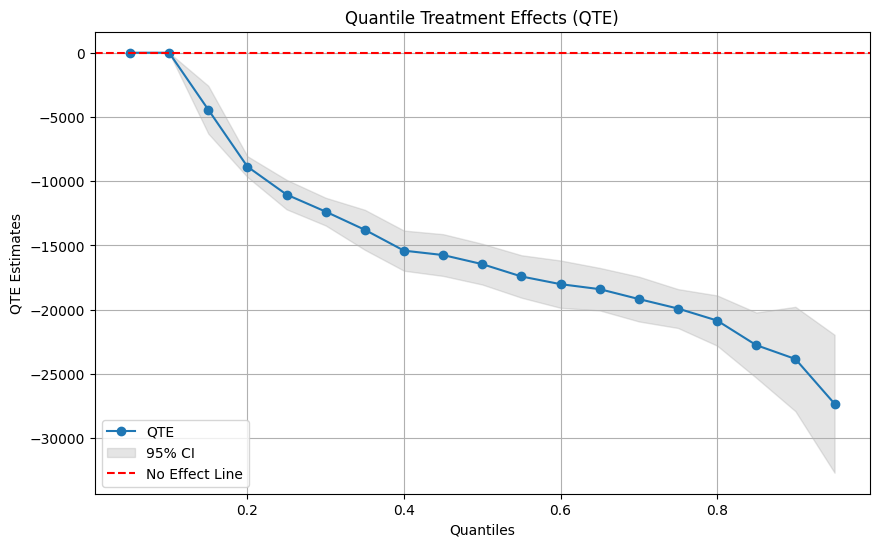

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000016,-0.000013,0.000044
1,0.10,-0.000011,-0.000034,0.000012
2,0.15,-4433.179614,-6294.614713,-2571.744515
3,0.20,-8866.359276,-9676.851145,-8055.867408
4,0.25,-11041.036576,-12190.508388,-9891.564764
5,0.30,-12369.655109,-13449.373969,-11289.936249
6,0.35,-13783.866527,-15341.399568,-12226.333487
7,0.40,-15404.987508,-16968.144810,-13841.830206
8,0.45,-15747.885346,-17373.855691,-14121.915001
9,0.50,-16455.862053,-18043.519274,-14868.204831


In [1]:
from pyqte.qte import QTEEstimator
import pandas as pd

lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

qte_estimator_1 = QTEEstimator(
    formula='re78 ~ treat', 
    xformla=None,  
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],  
    se=True,                  
    iters=100                 
)

qte_estimator_1.fit()
qte_estimator_1.summary()
qte_estimator_1.plot()
qte_estimator_1.get_results()

##### Com Covariáveis

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~10s           |+                                                 | 2 % ~08s           |++                                                | 3 % ~09s           |++                                                | 4 % ~09s           |+++                                               | 5 % ~09s           |+++                                               | 6 % ~09s           |++++                                              | 7 % ~09s           |++++                                              | 8 % ~09s           |+++++                                             | 9 % ~09s           |+++++                                             | 10% ~09s           |++++++                                            | 11% ~08s           |++++++                                            | 12% ~09s           |+++++++                                           | 13% ~08s 

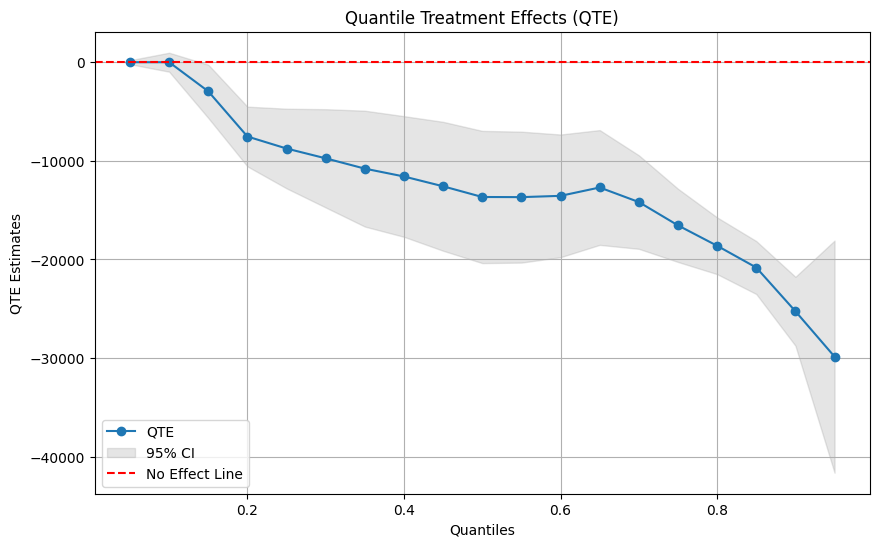

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000006,-201.540677,201.540689
1,0.10,0.000027,-961.593271,961.593326
2,0.15,-2955.453052,-5657.629315,-253.276789
3,0.20,-7536.405174,-10566.582607,-4506.227742
4,0.25,-8754.130926,-12792.887859,-4715.373992
5,0.30,-9748.070979,-14731.338537,-4764.803421
6,0.35,-10792.620230,-16667.842840,-4917.397620
7,0.40,-11588.752156,-17706.413072,-5471.091240
8,0.45,-12583.218990,-19119.663392,-6046.774587
9,0.50,-13667.878476,-20371.998342,-6963.758610


In [2]:
from pyqte.qte import QTEEstimator
import pandas as pd

# Carregar os dados
lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

# Inicialize o estimador QTE com covariáveis adicionais
qte_estimator_2 = QTEEstimator(
    formula='re78 ~ treat', 
    xformla='~ age + I(age^2) + education + black + hispanic + married + nodegree',  # Covariáveis adicionais
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    se=True,                  # Não calcular erros padrão
    iters=100                  # Número de iterações do bootstrap
)

qte_estimator_2.fit()
qte_estimator_2.summary()
qte_estimator_2.plot()
qte_estimator_2.get_results()

#### QTET - Quantile Treatment Effect on the Treated (QTETEstimator)

O método qtet implementa estimativas do Efeito do Tratamento Quantil no Tratado (QTET) sob uma Suposição de Independência Condicional (às vezes chamada de Seleção em Observáveis) desenvolvida em Firpo (2007). Este método usa a reponderação do escore de propensão e minimiza uma função de verificação para calcular o QTET. Erros padrão (se solicitados) são calculados usando o bootstrap.

* Firpo, Sergio. “Efficient Semiparametric Estimation of Quantile Treatment Effects.” Econometrica 75.1, pp. 259-276, 2007.

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~00s           |++++++++++                                        | 20% ~00s           |+++++++++++++++                                   | 30% ~00s           |++++++++++++++++++++                              | 40% ~00s           |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++                    | 60% ~00s           |+++++++++++++++++++++++++++++++++++               | 70% ~00s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~00s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	     0.00	     0.00
0.1	     0.00	     0.00
0.15	 -4388.53	   559.28
0.2	 -8783.29	   287.02
0.25	-11171.92	   419.88
0.3	-12434.94	   390.69
0.35	-137

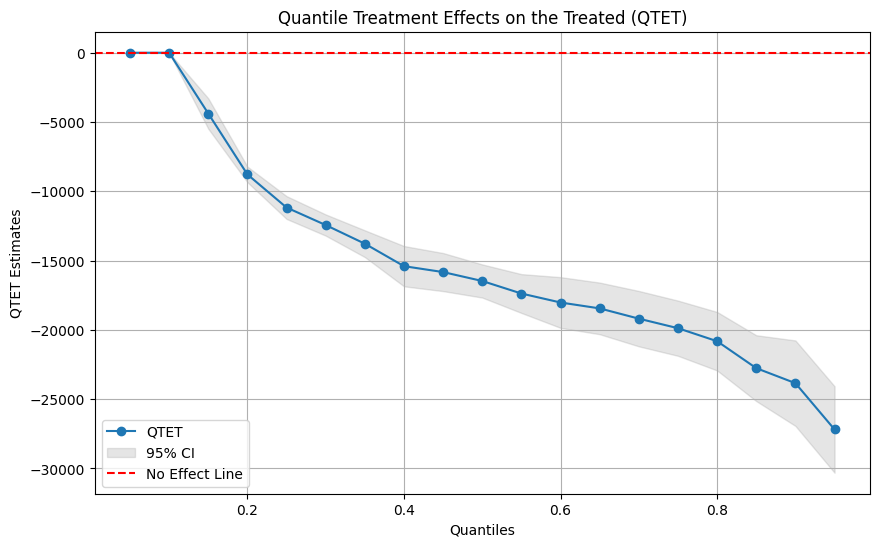

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000000,0.000000,0.000000
1,0.10,0.000000,0.000000,0.000000
2,0.15,-4388.531250,-5484.706460,-3292.356040
3,0.20,-8783.287426,-9345.839530,-8220.735322
4,0.25,-11171.916528,-11994.863463,-10348.969594
5,0.30,-12434.940164,-13200.667736,-11669.212592
6,0.35,-13780.900273,-14747.028440,-12814.772106
7,0.40,-15401.863369,-16855.415017,-13948.311721
8,0.45,-15827.888404,-17201.558292,-14454.218517
9,0.50,-16472.180469,-17667.987573,-15276.373365


In [3]:
from pyqte.qtet import QTETEstimator
import pandas as pd

# Carregar os dados
lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

# Inicializar o estimador QTET sem covariáveis
qtet_estimator_1 = QTETEstimator(
    formula='re78 ~ treat', 
    xformla=None,  # Sem covariáveis adicionais
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],   # Quantis de interesse
    se=True,                    # Não calcular erros padrão
    iters=10                    # Número de iterações do bootstrap
)

qtet_estimator_1.fit()
qtet_estimator_1.summary()
qtet_estimator_1.plot()
qtet_estimator_1.get_results()

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~07s           |+                                                 | 2 % ~05s           |++                                                | 3 % ~05s           |++                                                | 4 % ~05s           |+++                                               | 5 % ~06s           |+++                                               | 6 % ~05s           |++++                                              | 7 % ~06s           |++++                                              | 8 % ~06s           |+++++                                             | 9 % ~06s           |+++++                                             | 10% ~05s           |++++++                                            | 11% ~05s           |++++++                                            | 12% ~05s           |+++++++                                           | 13% ~05s 

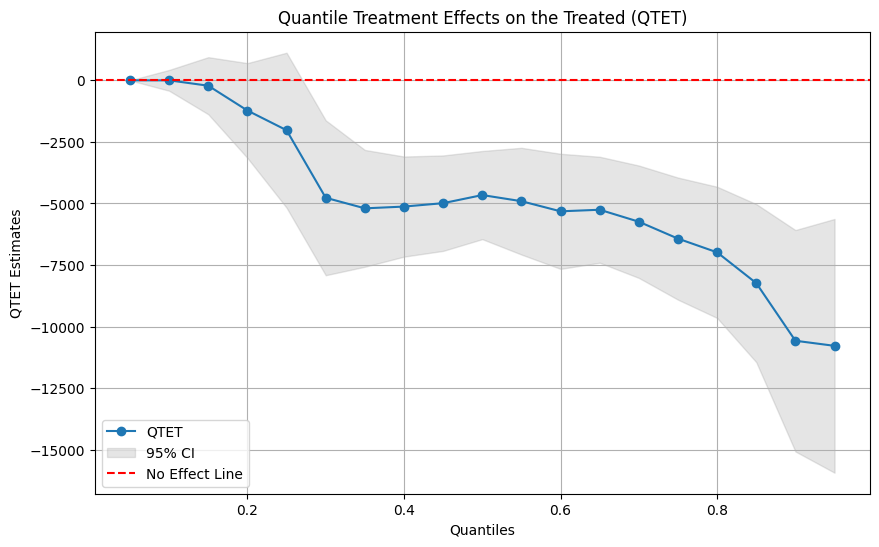

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,-0.000077,-0.000098,-0.000056
1,0.10,-0.000052,-422.674399,422.674296
2,0.15,-218.703540,-1377.867247,940.460167
3,0.20,-1226.513024,-3152.443047,699.416999
4,0.25,-2025.712561,-5172.761523,1121.336401
5,0.30,-4768.961252,-7914.698900,-1623.223604
6,0.35,-5198.264421,-7569.986655,-2826.542188
7,0.40,-5126.631534,-7159.271601,-3093.991467
8,0.45,-4988.253595,-6926.437742,-3050.069447
9,0.50,-4659.234578,-6449.123073,-2869.346084


In [4]:
from pyqte.qtet import QTETEstimator
import pandas as pd

# Carregar os dados
lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

# Inicializar o estimador QTET com covariáveis
qtet_estimator_2 = QTETEstimator(
    formula='re78 ~ treat', 
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree', 
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    se=True,                  # Não calcular erros padrão
    iters=100                  # Número de iterações do bootstrap
)

qtet_estimator_2.fit()
qtet_estimator_2.summary()
qtet_estimator_2.plot()
qtet_estimator_2.get_results()

##### CIC - Changes-in-Changes (CiCEstimator)

CiC calcula o Quantile Treatment Effect on the Treated (QTET) usando o método de **Athey e Imbens (2006)**. CiC é um método do tipo Difference in Differences. Ele requer ter dois períodos de dados que podem ser seções transversais repetidas ou dados de painel. O método pode acomodar condicionamento em covariáveis, embora o faça de forma restritiva: ele especifica um modelo linear para resultados condicionais em dummies de grupo-tempo e covariáveis. Então, após a residualização (veja detalhes em Athey e Imbens (2006)), ele calcula o modelo Change in Changes com base nesses quase-resíduos.

* Athey, Susan and Guido Imbens. “Identification andInference in Nonlinear Difference-in-Differences Models.” Econometrica 74.2, pp. 431-497, 2006.


Quantile Treatment Effect:
		
tau	QTE
0.05	   0.00
0.1	   0.00
0.15	   0.00
0.2	   0.00
0.25	 485.23
0.3	 929.88
0.35	1460.36
0.4	2321.11
0.45	3462.56
0.5	4232.31
0.55	5010.34
0.6	6210.67
0.65	7458.11
0.7	7508.97
0.75	8210.84
0.8	8332.69
0.85	8515.98
0.9	8822.00
0.95	8273.74

Average Treatment Effect:	4629.24



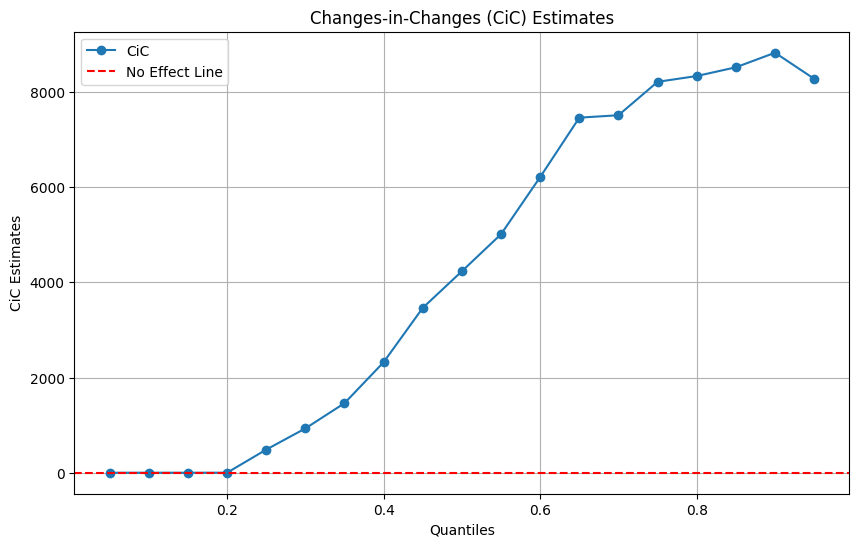

,Quantile,QTE
0,0.05,0.000000
1,0.10,0.000000
2,0.15,0.000000
3,0.20,0.000000
4,0.25,485.230000
5,0.30,929.884000
6,0.35,1460.360000
7,0.40,2321.110000
8,0.45,3462.560000
9,0.50,4232.310000


In [5]:
from pyqte.cic import CiCEstimator
import pandas as pd

# Carregar os dados
lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicialize o estimador CiC com as mesmas configurações do exemplo em R
cic_estimator = CiCEstimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    se=False,  # Não calcular erros padrão
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    iters=10                  # Número de iterações do bootstrap
)

cic_estimator.fit()
summary_cic = cic_estimator.summary()
cic_estimator.plot()
cic_estimator.get_results()

##### DDiD2 

ddid2 calcula o efeito do tratamento quantílico sobre os tratados (QTET) usando o método de Callaway, Li e Oka (2015).

* Callaway, Brantly, Dong Li, and Tatsushi Oka. “Quantile Treatment Effects in Difference in Differences Models under Dependence Restrictions and with Only Two Time Periods.” Journal of Econometrics (https://doi.org/10.1016/j.jeconom.2018.06.008), pp. 395-413, 2018.


##### Sem covariáveis

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~20s           |+                                                 | 2 % ~20s           |++                                                | 3 % ~19s           |++                                                | 4 % ~18s           |+++                                               | 5 % ~18s           |+++                                               | 6 % ~18s           |++++                                              | 7 % ~17s           |++++                                              | 8 % ~17s           |+++++                                             | 9 % ~17s           |+++++                                             | 10% ~17s           |++++++                                            | 11% ~17s           |++++++                                            | 12% ~17s           |+++++++                                           | 13% ~17s 

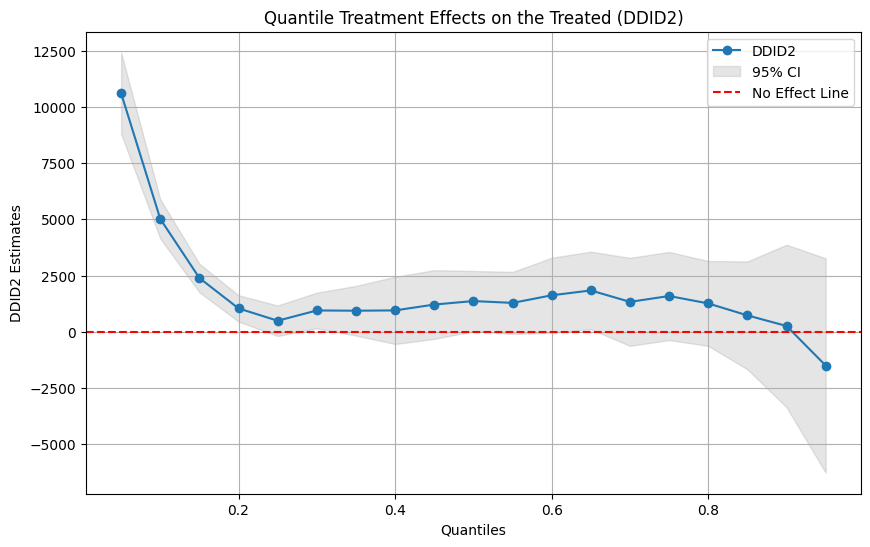

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,10616.612695,8808.735639,12424.489751
1,0.10,5019.825977,4143.871963,5895.779991
2,0.15,2388.119824,1754.721650,3021.517999
3,0.20,1033.226367,446.595535,1619.857200
4,0.25,485.230000,-195.478875,1165.938875
5,0.30,943.047200,149.168219,1736.926181
6,0.35,931.452555,-175.115299,2038.020408
7,0.40,945.353344,-551.024066,2441.730754
8,0.45,1205.884527,-326.085349,2737.854404
9,0.50,1362.109805,22.179190,2702.040419


In [6]:
from pyqte.ddid2 import DDID2Estimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador DDID2 com as mesmas configurações do exemplo em R
ddid2_estimator_1 = DDID2Estimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=True,
    probs=[0.05, 0.95, 0.05],
    iters=100
)

ddid2_estimator_1.fit()
ddid2_estimator_1.summary()
ddid2_estimator_1.plot()
ddid2_estimator_1.get_results()


##### Com covariáveis


Quantile Treatment Effect:
		
tau	QTE
0.05	 9832.19
0.1	 4544.63
0.15	 2068.77
0.2	  849.12
0.25	  485.23
0.3	  943.05
0.35	  817.00
0.4	  681.37
0.45	 1010.12
0.5	  992.30
0.55	  938.13
0.6	  950.31
0.65	  977.04
0.7	  366.22
0.75	  563.49
0.8	 -352.59
0.85	 -825.48
0.9	-1978.06
0.95	-3333.16

Average Treatment Effect:	1665.63



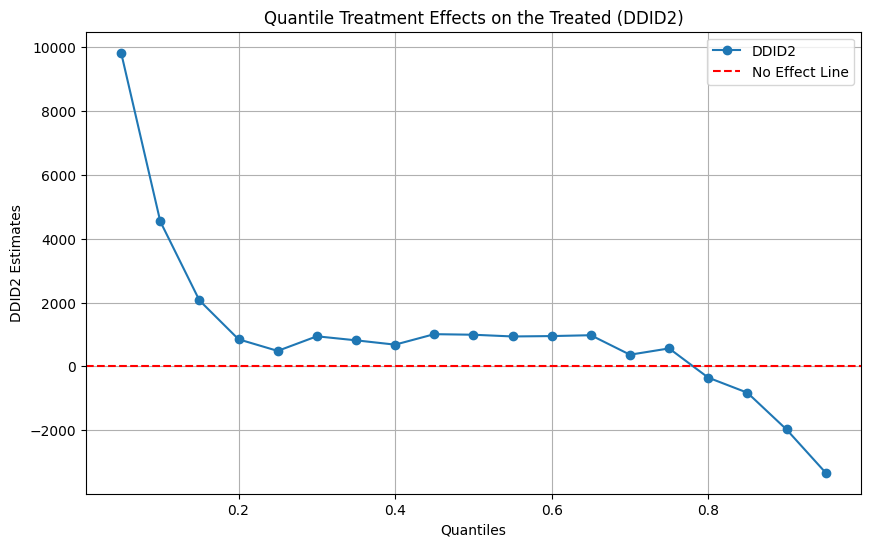

,Quantile,QTE
0,0.05,9832.189062
1,0.10,4544.634277
2,0.15,2068.765676
3,0.20,849.123047
4,0.25,485.230000
5,0.30,943.047200
6,0.35,817.003304
7,0.40,681.370566
8,0.45,1010.114925
9,0.50,992.301797


In [7]:
from pyqte.ddid2 import DDID2Estimator
import pandas as pd

# Carregar os dados
lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador DDID2 com fórmula e covariáveis
ddid2_estimator_2 = DDID2Estimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=False,
    probs=[0.05, 0.95, 0.05],
    iters=100
)

ddid2_estimator_2.fit()
ddid2_estimator_2.summary()
ddid2_estimator_2.plot()
ddid2_estimator_2.get_results()

##### MDID

MDiD é um método do tipo Difference in Differences para calcular o QTET. O método pode acomodar condicionamento em covariáveis, embora o faça de forma restritiva: ele especifica um modelo linear para resultados condicionais em dummies de grupo-tempo e covariáveis. Então, após a residualização (veja detalhes em Athey e Imbens (2006)), ele calcula o modelo Change in Changes com base nesses quase-resíduos.

* Athey, Susan andGuidoImbens. “Identification and Inference in Nonlinear Difference-in-Differences Models.” Econometrica 74.2, pp. 431-497, 2006. 
* Thuysbaert, Bram. “Distributional Comparisons in Difference in Differences Models.” Working Paper, 2007.


Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	 -57.93	1199.64
0.1	  92.45	1022.77
0.15	 570.02	 957.28
0.2	  35.09	 897.51
0.25	 286.78	 842.17
0.3	 443.70	 749.70
0.35	 258.39	 857.54
0.4	 914.24	1069.33
0.45	 985.05	1014.50
0.5	1365.56	1089.10
0.55	2053.59	1164.67
0.6	2890.01	1176.40
0.65	2826.56	1037.43
0.7	2943.04	 903.27
0.75	2269.17	1036.37
0.8	3198.58	1393.38
0.85	4440.13	1581.62
0.9	4427.63	1239.73
0.95	5820.01	2077.20

Average Treatment Effect:	2326.51
	 Std. Error: 		826.53



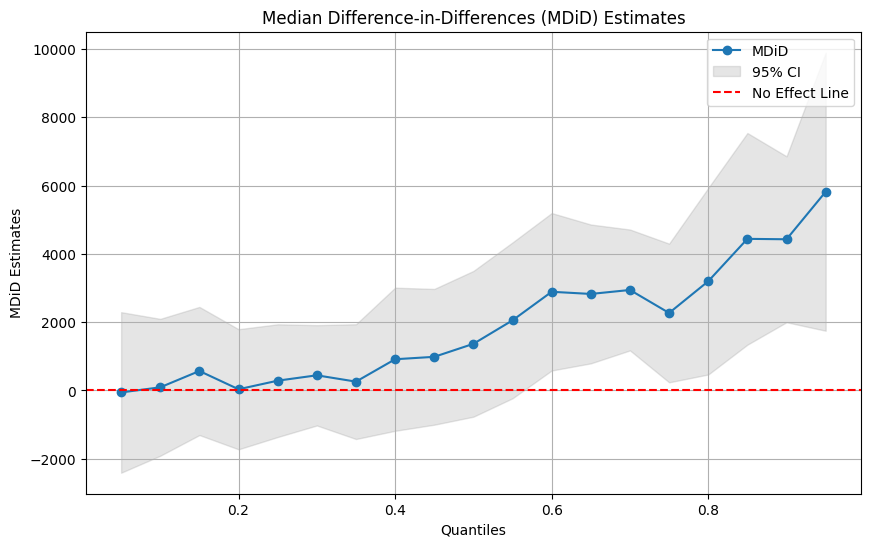

,Quantile,MDiD,MDiD Lower Bound,MDiD Upper Bound
0,0.05,-57.934308,-2409.186836,2293.318220
1,0.10,92.449967,-1912.149407,2097.049342
2,0.15,570.024307,-1306.210231,2446.258845
3,0.20,35.091288,-1724.003255,1794.185832
4,0.25,286.781331,-1363.841310,1937.403971
5,0.30,443.703593,-1025.684715,1913.091901
6,0.35,258.385864,-1422.364086,1939.135814
7,0.40,914.242225,-1181.601051,3010.085501
8,0.45,985.051221,-1003.332437,2973.434879
9,0.50,1365.558181,-769.039362,3500.155724


In [8]:
from pyqte.mdid import MDiDEstimator
import pandas as pd

# Carregar os dados
lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador MDiD com covariáveis
mdid_estimator = MDiDEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=True,
    probs=[0.05, 0.95, 0.05]
)

mdid_estimator.fit()
mdid_estimator.summary()
mdid_estimator.plot()
mdid_estimator.get_results()

##### Panel QTET - Panel Quantile Treatment Effect on the Treated (PanelQTETEstimator)

PanelQTETEstimator calcula o Quantile Treatment Effect on the Treated (QTET) usando o método de **Callaway e Li (2019)**. Este método deve ser usado quando o pesquisador deseja invocar uma suposição Difference in Differences para identificar o QTET. Em relação aos outros métodos Difference in Differences disponíveis no pacote qte, as suposições deste método são mais intuitivamente semelhantes às suposições de identificação usadas na identificação do Average Treatment Effect on the Treated (ATT). Além disso, este método pode acomodar covariáveis ​​de uma forma mais flexível do que os outros métodos Difference in Differences disponíveis. Para acomodar covariáveis, o usuário deve especificar um vetor x de nomes de covariáveis. O usuário também pode especificar um método para estimar o escore de propensão. O padrão é logit. No entanto, panel.qtet só pode ser usado em algumas situações. O método requer três períodos de dados do painel em que os indivíduos não são tratados até o último período. Os dados devem ser formatados como um painel; os nomes das colunas contendo períodos de tempo e IDs para cada unidade transversal precisam ser passados ​​para o método.

* Callaway, Brantly and Tong Li. “Quantile Treatment Effects in Difference in Differences Models with Panel Data.” Quantitative Economics (https://doi.org/10.3982/QE935), 2019.

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~21s           |+                                                 | 2 % ~19s           |++                                                | 3 % ~19s           |++                                                | 4 % ~18s           |+++                                               | 5 % ~18s           |+++                                               | 6 % ~17s           |++++                                              | 7 % ~17s           |++++                                              | 8 % ~16s           |+++++                                             | 9 % ~16s           |+++++                                             | 10% ~16s           |++++++                                            | 11% ~16s           |++++++                                            | 12% ~16s           |+++++++                                           | 13% ~15s 

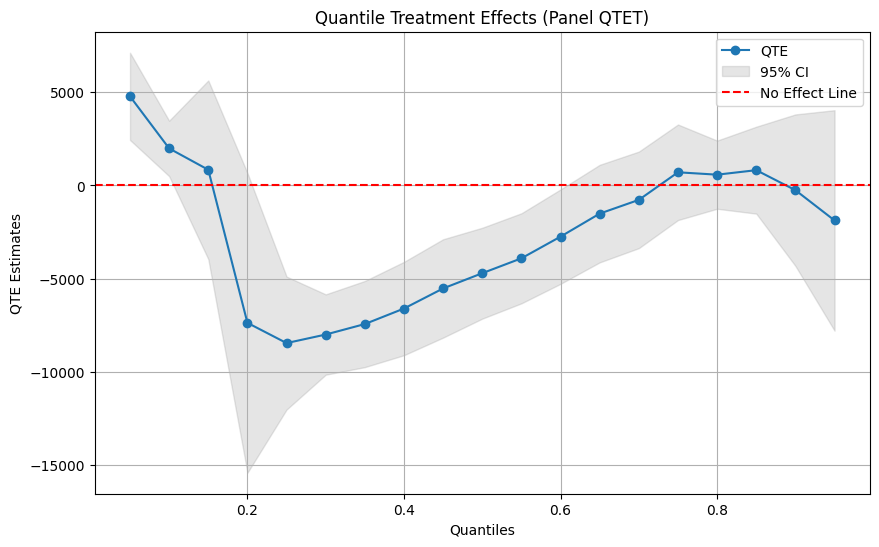

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,4779.208309,2439.232348,7119.184270
1,0.10,1987.352753,501.746597,3472.958910
2,0.15,842.947664,-3945.116351,5631.011679
3,0.20,-7366.043682,-15401.613783,669.526419
4,0.25,-8449.964114,-12014.244866,-4885.683363
5,0.30,-7992.146914,-10146.197945,-5838.095884
6,0.35,-7429.210114,-9739.089215,-5119.331014
7,0.40,-6597.368114,-9100.388237,-4094.347992
8,0.45,-5519.446114,-8156.857081,-2882.035148
9,0.50,-4702.884114,-7140.075267,-2265.692962


In [9]:
# Run the PanelQTETEstimator on the experimental data with no covariates
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq1 = PanelQTETEstimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,
    probs=[0.05, 0.95, 0.05]
)

pq1.fit()
pq1.summary()
pq1.plot()
pq1.get_results()

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~15s           |+                                                 | 2 % ~15s           |++                                                | 3 % ~15s           |++                                                | 4 % ~14s           |+++                                               | 5 % ~14s           |+++                                               | 6 % ~14s           |++++                                              | 7 % ~14s           |++++                                              | 8 % ~14s           |+++++                                             | 9 % ~14s           |+++++                                             | 10% ~14s           |++++++                                            | 11% ~14s           |++++++                                            | 12% ~14s           |+++++++                                           | 13% ~14s 

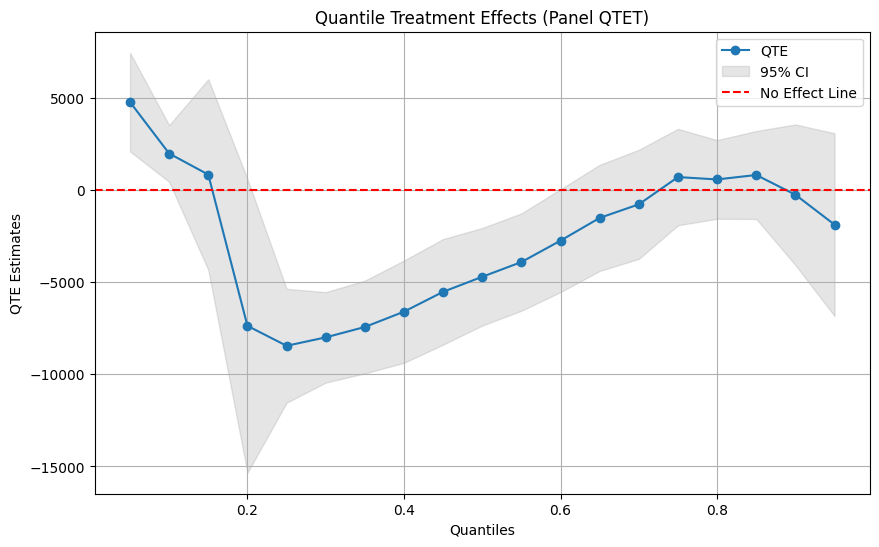

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,4779.208309,2100.954832,7457.461786
1,0.10,1987.352753,451.568737,3523.136770
2,0.15,842.947664,-4332.566835,6018.462163
3,0.20,-7366.043682,-15339.224750,607.137387
4,0.25,-8449.964114,-11542.499203,-5357.429026
5,0.30,-7992.146914,-10447.624122,-5536.669707
6,0.35,-7429.210114,-9946.303372,-4912.116857
7,0.40,-6597.368114,-9374.332031,-3820.404198
8,0.45,-5519.446114,-8384.684402,-2654.207827
9,0.50,-4702.884114,-7350.984041,-2054.784188


In [10]:
#Run the panel.qtet method on the observational data with no covariates
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq2 = PanelQTETEstimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,  # Não calcular erros padrão
    probs=[0.05, 0.95, 0.05]  # Quantis de interesse
)

pq2.fit()
pq2.summary()
pq2.plot()
pq2.get_results()

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~07s           |++++++++++                                        | 20% ~06s           |+++++++++++++++                                   | 30% ~05s           |++++++++++++++++++++                              | 40% ~04s           |+++++++++++++++++++++++++                         | 50% ~03s           |++++++++++++++++++++++++++++++                    | 60% ~02s           |+++++++++++++++++++++++++++++++++++               | 70% ~02s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~01s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=06s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	 2953.75	  748.98
0.1	 1762.13	 1009.47
0.15	  630.91	 2535.55
0.2	-7254.06	 2464.25
0.25	-6768.83	 1240.99
0.3	-6311.01	 1339.60
0.35	-5748.07	 1404.2

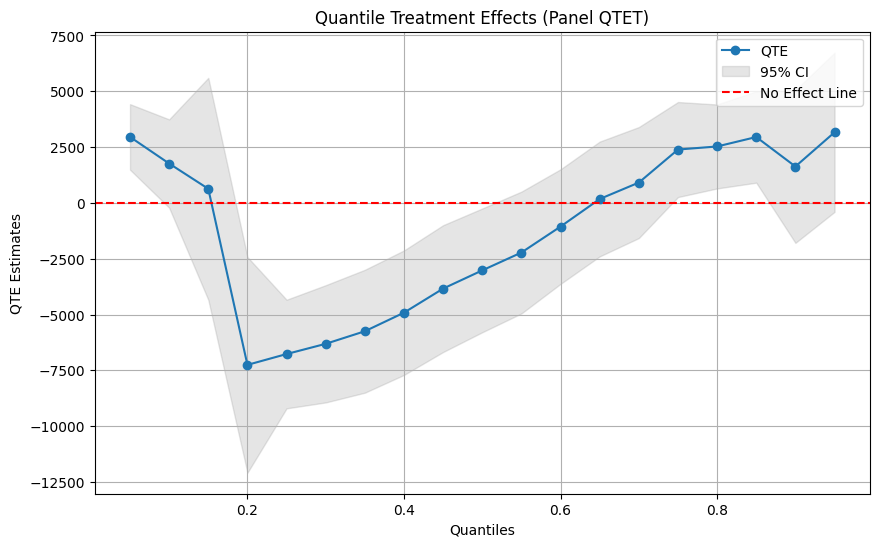

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,2953.749581,1485.766986,4421.732176
1,0.10,1762.134323,-216.393577,3740.662223
2,0.15,630.906704,-4338.677957,5600.491366
3,0.20,-7254.058293,-12083.896960,-2424.219626
4,0.25,-6768.828293,-9201.117545,-4336.539041
5,0.30,-6311.011093,-8936.584423,-3685.437763
6,0.35,-5748.074293,-8500.363124,-2995.785462
7,0.40,-4916.232293,-7703.742892,-2128.721694
8,0.45,-3838.310293,-6678.056777,-998.563809
9,0.50,-3021.748293,-5793.237632,-250.258954


In [11]:
# Run the panel.qtet method on the observational data conditioning on age, education, black, hispanic, married, and nodegree. The propensity score will be estimated using the default logit method. 
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq3 = PanelQTETEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',  # Covariáveis
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,                           
    iters=10,
    method="pscore",                    # propensity score (logit)
    probs=[0.05, 0.95, 0.05]            
)

pq3.fit()
pq3.summary()
pq3.plot()
pq3.get_results()

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~06s           |++++++++++                                        | 20% ~05s           |+++++++++++++++                                   | 30% ~05s           |++++++++++++++++++++                              | 40% ~04s           |+++++++++++++++++++++++++                         | 50% ~03s           |++++++++++++++++++++++++++++++                    | 60% ~03s           |+++++++++++++++++++++++++++++++++++               | 70% ~02s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~01s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=07s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	    0.00	    0.00
0.1	    0.00	  142.06
0.15	 -218.70	  684.01
0.2	-2159.20	  895.41
0.25	-2538.65	 1278.36
0.3	-3378.66	 1057.29
0.35	-3370.51	 1136.3

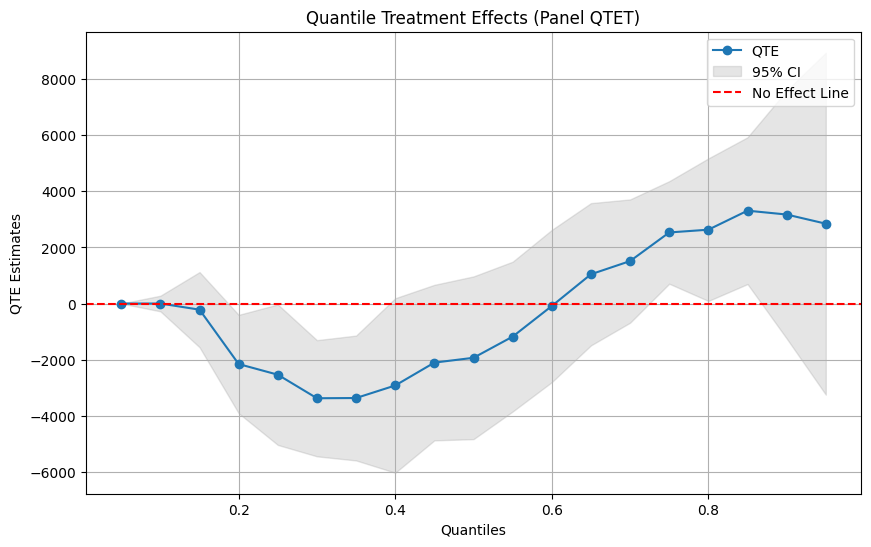

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000000,0.000000,0.000000
1,0.10,0.000000,-278.429829,278.429829
2,0.15,-218.703537,-1559.335487,1121.928413
3,0.20,-2159.197164,-3914.164438,-404.229890
4,0.25,-2538.650000,-5044.194443,-33.105557
5,0.30,-3378.662800,-5450.912046,-1306.413554
6,0.35,-3370.513559,-5597.724994,-1143.302124
7,0.40,-2922.880738,-6035.053216,189.291739
8,0.45,-2107.042000,-4881.237928,667.153928
9,0.50,-1935.370000,-4837.516069,966.776069


In [12]:
# Covariates and Quantile Regression (qr)
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq4 = PanelQTETEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',  # Covariáveis
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,  
    iters=10,
    method="qr",                        # Quantile Regression (qr)
    probs=[0.05, 0.95, 0.05]  
)

pq4.fit()
pq4.summary()
pq4.plot()
pq4.get_results()

#### Quantile Difference-in-Differences (QDiD - QDiDEstimator)

QDiD is a Difference in Differences type method for computing the QTET. The method can accommodate conditioning on covariates though it does so in a restrictive way: It specifies a linear model for outcomes conditional on group-time dummies and covariates. Then, after residualizing (see details in Athey and Imbens (2006)), it computes the Change in Changes model based on these quasi-residuals.

* Athey, Susan and GuidoImbens. “Identification andInference in Nonlinear Difference-in-Differences Models.” Econometrica 74.2, pp. 431-497, 2006.

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~09s           |++++++++++                                        | 20% ~08s           |+++++++++++++++                                   | 30% ~07s           |++++++++++++++++++++                              | 40% ~06s           |+++++++++++++++++++++++++                         | 50% ~05s           |++++++++++++++++++++++++++++++                    | 60% ~04s           |+++++++++++++++++++++++++++++++++++               | 70% ~03s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~02s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=10s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	  306.34	  467.95
0.1	 -606.23	  540.55
0.15	 -856.17	  624.09
0.2	-1430.94	  638.44
0.25	-1200.28	  751.75
0.3	 -902.21	  900.74
0.35	 -500.36	  936.4

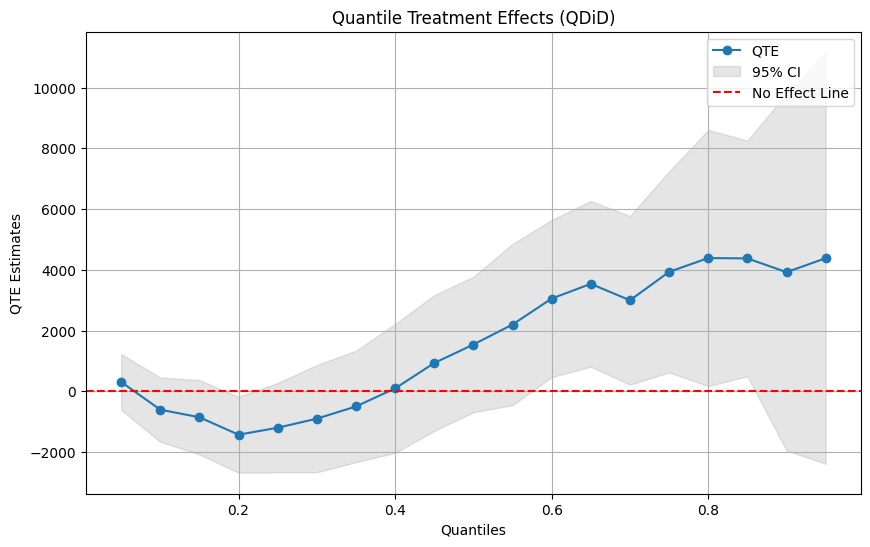

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,306.339240,-610.826305,1223.504784
1,0.10,-606.234021,-1665.700141,453.232098
2,0.15,-856.170786,-2079.357512,367.015940
3,0.20,-1430.938504,-2682.264932,-179.612076
4,0.25,-1200.275293,-2673.684184,273.133598
5,0.30,-902.212286,-2667.632153,863.207582
6,0.35,-500.362217,-2335.761934,1335.037501
7,0.40,94.128294,-2028.902864,2217.159451
8,0.45,930.035767,-1304.902652,3164.974186
9,0.50,1538.915913,-692.479705,3770.311531


In [13]:
## Run the Quantile Difference in Differences method conditioning on age, education, black, hispanic, married, and nodegree.
from pyqte.qdid import QDiDEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

qdid_estimator = QDiDEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=True,  # Não calcular erros padrão
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    iters=10
)

qdid_estimator.fit()
qdid_estimator.summary()
qdid_estimator.plot()
qdid_estimator.get_results()

##### SpATT

* Abadie, Alberto. 2005. “Semiparametric Difference-in-Differences Estimators.” The Review of Economic Studies 72 (1): 1–19.

In [14]:
from pyqte.spatt import SpATTEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador SpATT sem covariáveis
spatt_estimator = SpATTEstimator(
    formula='re ~ treat',    # Fórmula especificando o resultado e o tratamento
    data=lalonde_psid_panel, # Conjunto de dados
    t=1978,                  # Período após o tratamento
    tmin1=1975,              # Período antes do tratamento
    tname='year',            # Nome da coluna que contém os períodos de tempo
    xformla=None,            # Nenhuma covariável adicional (x=NULL em R)
    idname='id',             # Nome da coluna que contém os identificadores únicos
    se=False                 # Não calcular erros padrão
)

spatt_estimator.fit()
spatt_estimator.summary()

Average Treatment Effect: 2326.51


: 